In [1]:
! pip install -q --upgrade sentence-transformers

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Agentic Sales RAG/telecom.csv')

In [7]:
df.columns

Index(['date', 'sales', 'sales_from_finance', 'total_ad_spend',
       'corp_Google_DISCOVERY_spend', 'corp_Google_DISPLAY_spend',
       'corp_Google_PERFORMANCE_MAX_spend', 'corp_Google_SEARCH_spend',
       'corp_Google_SHOPPING_spend', 'corp_Google_VIDEO_spend',
       'corp_Horizon_VIDEO_TIER_1_spend', 'corp_Horizon_VIDEO_TIER_2_spend',
       'corp_Horizon_VIDEO_TIER_3_spend', 'corp_Horizon_VIDEO_TIER_BC_spend',
       'corp_Horizon_VIDEO_TIER_HISP_spend',
       'corp_Horizon_VIDEO_TIER_NA_spend', 'corp_Horizon_VIDEO_TIER_OTT_spend',
       'corp_Horizon_VIDEO_TIER_SYND_spend', 'corp_Impact_AFFILIATE_spend',
       'corp_Meta_SOCIAL_spend', 'corp_Microsoft_AUDIENCE_spend',
       'corp_Microsoft_SEARCH_CONTENT_spend', 'corp_Microsoft_SHOPPING_spend',
       'local_Google_DISPLAY_spend', 'local_Google_LOCAL_spend',
       'local_Google_PERFORMANCE_MAX_spend', 'local_Google_SEARCH_spend',
       'local_Google_SHOPPING_spend', 'local_Meta_SOCIAL_spend',
       'local_Simpli_fi_GEO_

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   date                                            1018 non-null   object 
 1   sales                                           1018 non-null   int64  
 2   sales_from_finance                              472 non-null    float64
 3   total_ad_spend                                  1018 non-null   float64
 4   corp_Google_DISCOVERY_spend                     1018 non-null   float64
 5   corp_Google_DISPLAY_spend                       1018 non-null   float64
 6   corp_Google_PERFORMANCE_MAX_spend               1018 non-null   float64
 7   corp_Google_SEARCH_spend                        1018 non-null   float64
 8   corp_Google_SHOPPING_spend                      1018 non-null   float64
 9   corp_Google_VIDEO_spend                  

In [9]:
df.isna().sum()

,0
date,0
sales,0
sales_from_finance,546
total_ad_spend,0
corp_Google_DISCOVERY_spend,0
corp_Google_DISPLAY_spend,0
corp_Google_PERFORMANCE_MAX_spend,0
corp_Google_SEARCH_spend,0
corp_Google_SHOPPING_spend,0
corp_Google_VIDEO_spend,0


In [10]:
df.shape

(1018, 38)

We have null values only in sales from finance

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
corr_matrix = df.corr()

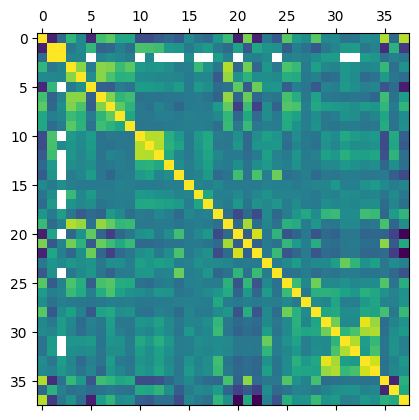

In [13]:
import matplotlib.pyplot as plt
plt.matshow(corr_matrix)
plt.show()

So the features are not highly correlated

In [14]:
pd.set_option('display.max_columns', None)
df.head(2)

,date,sales,sales_from_finance,total_ad_spend,corp_Google_DISCOVERY_spend,corp_Google_DISPLAY_spend,corp_Google_PERFORMANCE_MAX_spend,corp_Google_SEARCH_spend,corp_Google_SHOPPING_spend,corp_Google_VIDEO_spend,corp_Horizon_VIDEO_TIER_1_spend,corp_Horizon_VIDEO_TIER_2_spend,corp_Horizon_VIDEO_TIER_3_spend,corp_Horizon_VIDEO_TIER_BC_spend,corp_Horizon_VIDEO_TIER_HISP_spend,corp_Horizon_VIDEO_TIER_NA_spend,corp_Horizon_VIDEO_TIER_OTT_spend,corp_Horizon_VIDEO_TIER_SYND_spend,corp_Impact_AFFILIATE_spend,corp_Meta_SOCIAL_spend,corp_Microsoft_AUDIENCE_spend,corp_Microsoft_SEARCH_CONTENT_spend,corp_Microsoft_SHOPPING_spend,local_Google_DISPLAY_spend,local_Google_LOCAL_spend,local_Google_PERFORMANCE_MAX_spend,local_Google_SEARCH_spend,local_Google_SHOPPING_spend,local_Meta_SOCIAL_spend,local_Simpli_fi_GEO_OPTIMIZED_DISPLAY_spend,local_Simpli_fi_GEO_OPTIMIZED_VIDEO_spend,local_Simpli_fi_SEARCH_DISPLAY_spend,local_Simpli_fi_SEARCH_VIDEO_spend,local_Simpli_fi_SITE_RETARGETING_DISPLAY_spend,local_Simpli_fi_SITE_RETARGETING_VIDEO_spend,stock_market_index,dollar_to_pound,interest_rates
0,2024-10-14,6029,5707.0,334455.301008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1547.28,134731.73,0.0,15801.95,0.0,0.0,0.0,0.0,0.0,0.0,8754.73,0.0,0.0,0.0,0.0,0.0,0.0,43065.218750,0.76634,4.08
1,2024-10-13,4699,4394.0,310771.383758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1542.86,129217.67,0.0,9087.83,0.0,0.0,0.0,0.0,0.0,0.0,8849.86,0.0,0.0,0.0,0.0,0.0,0.0,42863.859375,0.76557,4.08


In [15]:
company_arr = []
for cols in df.columns:
  split = str(cols).split('_')
  if len(split) > 2:
    company = split[1]
    company_arr.append(company)

companies = list(set(company_arr))
print(companies)

['Simpli', 'Microsoft', 'Impact', 'ad', 'from', 'to', 'Horizon', 'Meta', 'market', 'Google']


In [16]:
company_list = ['Meta', 'Simpli_fi', 'Impact', 'Horizon', 'Google', 'Microsoft']

This will add a column which will give us total amount spend by the Company

In [17]:
df.fillna(0, inplace = True)

In [18]:
df.shape

(1018, 38)

In [19]:
for idx, rows in df.iterrows():
  cols = list(df.columns)
  for company in company_list:
    total_spend = 0
    company = company.lower()
    for col in cols:
      if col != f'{company}_total_spend':
        coll = col.lower()
        if coll.find(company) != -1:
          if str(rows[col]) == 'nan':
            total_spend = total_spend + 0
          else:
            total_spend = total_spend + rows[col]
    df.loc[idx, f'{company}_total_spend'] = total_spend

In [20]:
pd.set_option('display.max_columns', None)
df.head(2)

,date,sales,sales_from_finance,total_ad_spend,corp_Google_DISCOVERY_spend,corp_Google_DISPLAY_spend,corp_Google_PERFORMANCE_MAX_spend,corp_Google_SEARCH_spend,corp_Google_SHOPPING_spend,corp_Google_VIDEO_spend,corp_Horizon_VIDEO_TIER_1_spend,corp_Horizon_VIDEO_TIER_2_spend,corp_Horizon_VIDEO_TIER_3_spend,corp_Horizon_VIDEO_TIER_BC_spend,corp_Horizon_VIDEO_TIER_HISP_spend,corp_Horizon_VIDEO_TIER_NA_spend,corp_Horizon_VIDEO_TIER_OTT_spend,corp_Horizon_VIDEO_TIER_SYND_spend,corp_Impact_AFFILIATE_spend,corp_Meta_SOCIAL_spend,corp_Microsoft_AUDIENCE_spend,corp_Microsoft_SEARCH_CONTENT_spend,corp_Microsoft_SHOPPING_spend,local_Google_DISPLAY_spend,local_Google_LOCAL_spend,local_Google_PERFORMANCE_MAX_spend,local_Google_SEARCH_spend,local_Google_SHOPPING_spend,local_Meta_SOCIAL_spend,local_Simpli_fi_GEO_OPTIMIZED_DISPLAY_spend,local_Simpli_fi_GEO_OPTIMIZED_VIDEO_spend,local_Simpli_fi_SEARCH_DISPLAY_spend,local_Simpli_fi_SEARCH_VIDEO_spend,local_Simpli_fi_SITE_RETARGETING_DISPLAY_spend,local_Simpli_fi_SITE_RETARGETING_VIDEO_spend,stock_market_index,dollar_to_pound,interest_rates,meta_total_spend,simpli_fi_total_spend,impact_total_spend,horizon_total_spend,google_total_spend,microsoft_total_spend
0,2024-10-14,6029,5707.0,334455.301008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1547.28,134731.73,0.0,15801.95,0.0,0.0,0.0,0.0,0.0,0.0,8754.73,0.0,0.0,0.0,0.0,0.0,0.0,43065.218750,0.76634,4.08,143486.46,0.0,1547.28,0.0,0.0,15801.95
1,2024-10-13,4699,4394.0,310771.383758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1542.86,129217.67,0.0,9087.83,0.0,0.0,0.0,0.0,0.0,0.0,8849.86,0.0,0.0,0.0,0.0,0.0,0.0,42863.859375,0.76557,4.08,138067.53,0.0,1542.86,0.0,0.0,9087.83


In [21]:
df.isna().sum()

,0
date,0
sales,0
sales_from_finance,0
total_ad_spend,0
corp_Google_DISCOVERY_spend,0
corp_Google_DISPLAY_spend,0
corp_Google_PERFORMANCE_MAX_spend,0
corp_Google_SEARCH_spend,0
corp_Google_SHOPPING_spend,0
corp_Google_VIDEO_spend,0


In [22]:
category = []
for cols in df.columns:
  for company in company_list:
    if cols.lower().find(company.lower()) != -1 and cols.lower().find('spend') != -1 and cols.lower() != f'{company.lower()}_total_spend':
      # doing +/- 1 for dealing with undeerscores
      start_index = cols.index(company) + len(company) + 1
      end_index = cols.index('spend') - 1
      category.append(cols[start_index:end_index])

In [23]:
category

['DISCOVERY',
 'DISPLAY',
 'PERFORMANCE_MAX',
 'SEARCH',
 'SHOPPING',
 'VIDEO',
 'VIDEO_TIER_1',
 'VIDEO_TIER_2',
 'VIDEO_TIER_3',
 'VIDEO_TIER_BC',
 'VIDEO_TIER_HISP',
 'VIDEO_TIER_NA',
 'VIDEO_TIER_OTT',
 'VIDEO_TIER_SYND',
 'AFFILIATE',
 'SOCIAL',
 'AUDIENCE',
 'SEARCH_CONTENT',
 'SHOPPING',
 'DISPLAY',
 'LOCAL',
 'PERFORMANCE_MAX',
 'SEARCH',
 'SHOPPING',
 'SOCIAL',
 'GEO_OPTIMIZED_DISPLAY',
 'GEO_OPTIMIZED_VIDEO',
 'SEARCH_DISPLAY',
 'SEARCH_VIDEO',
 'SITE_RETARGETING_DISPLAY',
 'SITE_RETARGETING_VIDEO']

In [24]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

embeddings = model.encode(category)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

# Step 3: Compute pairwise similarity
similarity_matrix = cosine_similarity(embeddings)

# Step 4: Create a graph with a similarity threshold
threshold = 0.8  # Adjust as needed to control grouping
graph = nx.Graph()

# Add edges for words with similarity above the threshold
for i in range(len(category)):
    for j in range(i + 1, len(category)):
        if similarity_matrix[i, j] > threshold:
            graph.add_edge(category[i], category[j])

# Step 5: Extract connected components as groups
groups = [list(component) for component in nx.connected_components(graph)]

# Step 6: Print the groups
for idx, group in enumerate(groups):
    print(f"Group {idx + 1}: {group}")

Group 1: ['DISPLAY']
Group 2: ['PERFORMANCE_MAX']
Group 3: ['SEARCH']
Group 4: ['SHOPPING']
Group 5: ['VIDEO_TIER_NA', 'VIDEO_TIER_HISP', 'VIDEO_TIER_2', 'VIDEO_TIER_3', 'VIDEO_TIER_SYND', 'VIDEO_TIER_OTT', 'VIDEO_TIER_BC', 'VIDEO_TIER_1']
Group 6: ['SOCIAL']


In [26]:
print(groups)

[['DISPLAY'], ['PERFORMANCE_MAX'], ['SEARCH'], ['SHOPPING'], ['VIDEO_TIER_NA', 'VIDEO_TIER_HISP', 'VIDEO_TIER_2', 'VIDEO_TIER_3', 'VIDEO_TIER_SYND', 'VIDEO_TIER_OTT', 'VIDEO_TIER_BC', 'VIDEO_TIER_1'], ['SOCIAL']]


In [27]:
final_cluster = {}
for group in groups:
  sub_words = []
  for categories in group:
    sub_words += categories.split('_')
  word_count = {}
  for words in sub_words:
    if word_count.get(words):
      word_count[words] += 1
    else:
      word_count[words] = 1
  final = ' '
  if len(word_count) > 1:
    value = [i for i in list(word_count.keys()) if word_count[i]==max(list(word_count.values()))]
    for k in value:
      final += k + '_'
    final = final[:-1]
  elif len(word_count) == 1:
    final = list(word_count.keys())[0]
  final_cluster[final.strip()] = group

In [28]:
print(final_cluster)

{'DISPLAY': ['DISPLAY'], 'PERFORMANCE_MAX': ['PERFORMANCE_MAX'], 'SEARCH': ['SEARCH'], 'SHOPPING': ['SHOPPING'], 'VIDEO_TIER': ['VIDEO_TIER_NA', 'VIDEO_TIER_HISP', 'VIDEO_TIER_2', 'VIDEO_TIER_3', 'VIDEO_TIER_SYND', 'VIDEO_TIER_OTT', 'VIDEO_TIER_BC', 'VIDEO_TIER_1'], 'SOCIAL': ['SOCIAL']}


In [29]:
df.shape

(1018, 44)

In [30]:
new_df = pd.DataFrame()

In [31]:
for idx, rows in df.iterrows():
  cols = list(df.columns)
  for key, value in final_cluster.items():
    total_spend = 0
    for adv_type in value:
      for col in cols:
        if col != f'{key}_total_spend':
          if col.find(adv_type) != -1:
            if str(rows[col]) == 'nan':
              total_spend = total_spend + 0
            else:
              total_spend = total_spend + rows[col]
    df.loc[idx, f'{key}_total_spend'] = total_spend

In [32]:
df.shape

(1018, 50)

In [33]:
print(df.columns)

Index(['date', 'sales', 'sales_from_finance', 'total_ad_spend',
       'corp_Google_DISCOVERY_spend', 'corp_Google_DISPLAY_spend',
       'corp_Google_PERFORMANCE_MAX_spend', 'corp_Google_SEARCH_spend',
       'corp_Google_SHOPPING_spend', 'corp_Google_VIDEO_spend',
       'corp_Horizon_VIDEO_TIER_1_spend', 'corp_Horizon_VIDEO_TIER_2_spend',
       'corp_Horizon_VIDEO_TIER_3_spend', 'corp_Horizon_VIDEO_TIER_BC_spend',
       'corp_Horizon_VIDEO_TIER_HISP_spend',
       'corp_Horizon_VIDEO_TIER_NA_spend', 'corp_Horizon_VIDEO_TIER_OTT_spend',
       'corp_Horizon_VIDEO_TIER_SYND_spend', 'corp_Impact_AFFILIATE_spend',
       'corp_Meta_SOCIAL_spend', 'corp_Microsoft_AUDIENCE_spend',
       'corp_Microsoft_SEARCH_CONTENT_spend', 'corp_Microsoft_SHOPPING_spend',
       'local_Google_DISPLAY_spend', 'local_Google_LOCAL_spend',
       'local_Google_PERFORMANCE_MAX_spend', 'local_Google_SEARCH_spend',
       'local_Google_SHOPPING_spend', 'local_Meta_SOCIAL_spend',
       'local_Simpli_fi_GEO_

Adding columns that will show different add spent impact.


For Eg:

``` total_ad_spent / stock price```

In [34]:
df['ad_spend_impact'] = df['total_ad_spend']/df['stock_market_index']
df['sales_impact'] = df['sales']/df['total_ad_spend']
df['sales_from_finance_impact'] = df['sales_from_finance']/df['total_ad_spend']

# how people are reacting when interest rates or currency price rise or fall.
df['dollar_to_pound_impact'] = df['dollar_to_pound']/df['sales']
df['interest_rates_impact'] = df['interest_rates']/df['sales']

As of now i am not manually caluclating the mean of different expenditures, rolling 7 days average, 20 day average.


Will check model performance without this, if the model will not perform good then i will eventually be adding all this in metadat infromation seperately, as all this is static information

In [36]:
df.to_excel('/content/drive/MyDrive/Agentic Sales RAG/optimized_dataset.xlsx')